# Data for Learning

In [146]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
%cd CSV_file_from_2007_to_2017

[Errno 2] No such file or directory: 'CSV_file_from_2007_to_2017'
/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [148]:
df_n = pd.read_csv("test.csv") #load data set saved from previous ops


In [149]:
df_n['PM10']= pd.to_numeric(df_n['PM10']) # Convert PM_10 column to Numeric Values

In [150]:
zeros=(df_n.PM10 == 0).sum(axis=0)
print("Number of zero values reported in PM10 readings: ", zeros)
#No zeros in the frame

Number of zero values reported in PM10 readings:  27


In [151]:
negativeValues = (df_n.PM10 <0).sum(axis=0)#No negative values in the frame
print("Number of negative values reported in PM10 readings: ", negativeValues)

Number of negative values reported in PM10 readings:  0


In [152]:
df_n['PM10'].replace('NaN', np.nan)[1:3] #replace NAn with zero np.nan

1      NaN
2    61.67
Name: PM10, dtype: float64

In [153]:
df_n[1:2]

,Unnamed: 0,date,Lat,Lon,PM10,NAME
1,1,2007-01-26 10:00:00,42.0036,21.4636,NaN,Gazi Baba


In [202]:
df_n.date= pd.to_datetime(df_n.date)  # CONVER TO DATE TIME 

In [203]:
df_n[0:2] # 

,Unnamed: 0,date,Lat,Lon,PM10,NAME
0,0,2007-01-26 10:00:00,41.9925,21.423611,NaN,Centar
1,1,2007-01-26 10:00:00,42.0036,21.463600,NaN,Gazi Baba


In [154]:
df_n.drop(['Lat','Lon','Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')
#drop non useful columns

In [155]:
df_n.date= pd.to_datetime(df_n.date)  # Convert to dat time

In [156]:
df_n.sort_values(by='date',ascending=True,inplace=True) # sort data sets

In [158]:
df_n[0:4]

,date,PM10,NAME
9414,2007-01-02,NaN,Miladinovci
9408,2007-01-02,NaN,Centar
9411,2007-01-02,NaN,Lisice
9412,2007-01-02,204.92,Rektorat


In [159]:
df_n = df_n.reset_index(drop=True) # reset index

In [160]:
df_n[0:5]

,date,PM10,NAME
0,2007-01-02,NaN,Miladinovci
1,2007-01-02,NaN,Centar
2,2007-01-02,NaN,Lisice
3,2007-01-02,204.92,Rektorat
4,2007-01-02,NaN,Mrsevci


In [13]:
#df_n.set_index('date',inplace=True); # set index as date 
#del df_n.index.name  # delete index name

<p> Count the Null Values present</p>

In [161]:
df_n.isnull().any() # date has no null value while PM10 has null value

date    False
PM10     True
NAME    False
dtype: bool

In [162]:
df_n.isnull().sum() # null value counts

date         0
PM10    255713
NAME         0
dtype: int64

In [163]:
df_n.dtypes

date    datetime64[ns]
PM10           float64
NAME            object
dtype: object

<p><b> Define Function to Make column with -1 for Nan and 1 for Numeric Values</b></p>
<p> Always we define a function to Normalize and Standardize data sets <p>

In [164]:

def Make_Indicator_Column_For_Nan(x):
    if (np.isnan(x)):
        val = 0
    else:
        val = 1
    return val

def Normalize(x):
    x = (x - x.mean())/(x.max()-x.min())
    return(x);

def first_difference(x):
    difference = x - x.shift(1);
    return (difference);

def Standardize(x):
    x = (x - x.mean())/x.std()
    return(x);

def recover(original_PandasSeries,differenced_PandasSeries):
    '''
    Using the diffreence data set , we need to recover the initial 
    set, this function does that:
    Input: Differenced pandas series
           Original Series 
    Output: Compute the original
    
    The aim is that when we make prediction with the differenced 
    data sets we should be able to convert to original set.
    '''
    i= 0;
    c = len(original_PandasSeries);
    recovered_set =[];
    #print(b)
    for k in range(0,c):
        if (k ==0):
            temp = a[k];
            recovered_set.append(temp);
        else:
            i=i+1;
            temp = original_PandasSeries[k-1]+ differenced_PandasSeries[i];
            recovered_set.append(temp);
    recovered_setArray=np.array(recovered_set);
    return (recovered_setArray)        


#d["recovered_set"] = recovered # add to data set
#Or use differece differenced_PandasSeries + differenced_PandasSeries.shift(1)

<p> Apply the function Above </p>

In [165]:
df_n['PM10_null_pointers']=df_n.PM10.apply(Make_Indicator_Column_For_Nan)

In [166]:
df_n[1:3]

,date,PM10,NAME,PM10_null_pointers
1,2007-01-02,NaN,Centar,0
2,2007-01-02,NaN,Lisice,0


In [167]:
df_Normalized = df_n.copy(deep=True)  #Normalized

In [168]:
df_Standardized = df_n.copy(deep=True) # Standardized

In [169]:
df_Normalized.PM10 = Normalize(df_Normalized.PM10) #Normalize

In [170]:
df_Standardized.PM10 = Standardize(df_Standardized.PM10) #Standardize

In [171]:
df_Normalized.head()

,date,PM10,NAME,PM10_null_pointers
0,2007-01-02,NaN,Miladinovci,0
1,2007-01-02,NaN,Centar,0
2,2007-01-02,NaN,Lisice,0
3,2007-01-02,0.118376,Rektorat,1
4,2007-01-02,NaN,Mrsevci,0


In [172]:
df_Standardized.head()

,date,PM10,NAME,PM10_null_pointers
0,2007-01-02,NaN,Miladinovci,0
1,2007-01-02,NaN,Centar,0
2,2007-01-02,NaN,Lisice,0
3,2007-01-02,1.499629,Rektorat,1
4,2007-01-02,NaN,Mrsevci,0


<p> <b> Differenced Data      </b> </p>

In [173]:
df_differenced = df_Normalized.copy(deep=True)

In [174]:
df_differenced.fillna(0,inplace=True)   #fill na to compute first difference 

In [175]:
df_differenced.PM10 = first_difference(df_differenced.PM10) # first Difference

In [176]:
df_differenced.isnull().sum()

date                  0
PM10                  1
NAME                  0
PM10_null_pointers    0
dtype: int64

In [177]:
df_differenced.fillna(0,inplace=True)   #fill na to compute first difference 

In [178]:
df_differenced[2340:2350]

,date,PM10,NAME,PM10_null_pointers
2340,2007-01-10 22:00:00,0.006117,Lisice,0
2341,2007-01-10 22:00:00,0.016462,Rektorat,1
2342,2007-01-10 22:00:00,-0.016462,Mrsevci,0
2343,2007-01-10 22:00:00,0.000000,Miladinovci,0
2344,2007-01-10 22:00:00,0.000000,Centar,0
2345,2007-01-10 23:00:00,0.000000,Centar,0
2346,2007-01-10 23:00:00,0.000000,Gazi Baba,0
2347,2007-01-10 23:00:00,0.002336,Karpos,1
2348,2007-01-10 23:00:00,-0.002336,Lisice,0
2349,2007-01-10 23:00:00,0.043752,Rektorat,1


# Import Additional feature sets

In [179]:
%ls


All_data.csv                        SkopjeRegion_SO2_airpointers.csv
Cov_nonstationary.png               Standardized_full
EasternRegion_CO_airpointers.csv    Var_nonstationary.png
EasternRegion_NO2_airpointers.csv   WesternRegion_CO_airpointers.csv
EasternRegion_O3_airpointers.csv    WesternRegion_NO2_airpointers.csv
EasternRegion_PM10_airpointers.csv  WesternRegion_O3_airpointers.csv
EasternRegion_PM25_airpointers.csv  WesternRegion_PM10_airpointers.csv
EasternRegion_SO2_airpointers.csv   WesternRegion_PM25_airpointers.csv
ImpurityList_Normalized             WesternRegion_SO2_airpointers.csv
ImpurityList_Standardized           data.xlsx
ImpurityList_with_Indicator         difference_full
Mean_nonstationary.png              newfile.xlsx
Normalized_full                     outfile
SkopjeRegion_CO_airpointers.csv     outfile1
SkopjeRegion_NO2_airpointers.csv    processed_with_columns_droped.csv
SkopjeRegion_O3_airpointers.csv     raw_processed.csv
SkopjeRegion_PM10_airpointers.csv   tes

In [228]:
# Import Data sets

In [180]:
df_CO = pd.read_csv('SkopjeRegion_CO_airpointers.csv');
df_NO2 = pd.read_csv('SkopjeRegion_NO2_airpointers.csv');
df_O3 = pd.read_csv('SkopjeRegion_O3_airpointers.csv');
df_SO3 = pd.read_csv('SkopjeRegion_SO2_airpointers.csv');
df_PM25 = pd.read_csv('SkopjeRegion_PM25_airpointers.csv');

In [181]:
ImpurityList = [df_CO,df_NO2,df_O3,df_PM25] #create data set list

In [182]:
# Preprocess data set 

def preprocess(FrameList):
    '''
    Input:
         List of Dataframes
    Output:
         List of data frames with 4 dropped columns and renamed
    '''
    
    
    for i in range(0,len(FrameList)):
        print(i)
        column_name=FrameList[i].columns[0]
        column_replace = FrameList[i].columns[0][18:-5]
        print (column_replace)
        FrameList[i] = FrameList[i].rename(columns = {column_name:'x'});
        FrameList[i]=pd.DataFrame(FrameList[i].x.str.split(';',5).tolist(),columns = ['date','Lat','Lon',column_replace,'NAME'])
        FrameList[i].drop(['Lat','Lon','NAME'], axis = 1, inplace = True, errors = 'ignore')
    return (FrameList);
    

In [183]:
# Apply function on List
DataFrameList = preprocess(ImpurityList);

0
CO
1
NO2
2
O3
3
PM25


In [184]:
# Add Indicator for other variables for the impurity
for i in range(0,len(DataFrameList)):
    l= DataFrameList[i].columns[1]
    print(l)
    DataFrameList[i][str(l)]= pd.to_numeric(DataFrameList[i][str(l)]) #
    DataFrameList[i][str(l)].replace('NaN', np.NaN) #replace NAn with zero np.nan
    DataFrameList[i][str(l)+' indicators']= DataFrameList[i][str(l)].apply(Make_Indicator_Column_For_Nan)
    
    

CO
NO2
O3
PM25


In [185]:
DataFrameList[0][0:5]

,date,CO,CO indicators
0,26.01.2007 10,0.49,1
1,26.01.2007 10,0.78,1
2,26.01.2007 10,1.02,1
3,26.01.2007 10,0.91,1
4,26.01.2007 10,1.00,1


<p> Same data set with pickle</p>

In [186]:
import pickle as pick
with open('ImpurityList_with_Indicator', 'wb') as fp:
    pick.dump(DataFrameList, fp)

In [187]:
import pickle as pick
with open ('ImpurityList_with_Indicator', 'rb') as fp:
    DataFrameList= pick.load(fp)

In [188]:
# Copy data set to define Normalized and Stabdardized sets
import copy
NewDataFrameListNormalized=copy.deepcopy(DataFrameList)
NewDataFrameListStandardized=copy.deepcopy(DataFrameList)

In [189]:
NewDataFrameListNormalized[0][0:8]

,date,CO,CO indicators
0,26.01.2007 10,0.49,1
1,26.01.2007 10,0.78,1
2,26.01.2007 10,1.02,1
3,26.01.2007 10,0.91,1
4,26.01.2007 10,1.00,1
5,26.01.2007 10,NaN,0
6,26.01.2007 10,NaN,0
7,15.01.2007 01,3.44,1


In [190]:
NewDataFrameListStandardized[0][0:8]

,date,CO,CO indicators
0,26.01.2007 10,0.49,1
1,26.01.2007 10,0.78,1
2,26.01.2007 10,1.02,1
3,26.01.2007 10,0.91,1
4,26.01.2007 10,1.00,1
5,26.01.2007 10,NaN,0
6,26.01.2007 10,NaN,0
7,15.01.2007 01,3.44,1


In [191]:
def datePreprocess(List):
    for i in range(0,len(List)):
        l = List[i].columns[0]
        print(l)
        #NewDataFrameListStandardized[i][str(l)] = Standardize(NewDataFrameListStandardized[i][str(l)]) #Normalize
        List[i][str(l)]= pd.to_datetime(List[i][str(l)])  # Convert to dat time
        List[i].sort_values(by=str(l),ascending=True,inplace=True) # sort data sets
        List[i] = List[i].reset_index(drop=True) # reset index
    return (List)  

In [192]:
NewDataFrameListNormalized_1 = datePreprocess(NewDataFrameListNormalized)

date
date
date
date


In [193]:
NewDataFrameListStandardized_2 =copy.deepcopy(NewDataFrameListNormalized_1)

In [194]:
NewDataFrameListStandardized_2[0][0:5]

,date,CO,CO indicators
0,2007-01-02,NaN,0
1,2007-01-02,3.33,1
2,2007-01-02,4.13,1
3,2007-01-02,2.73,1
4,2007-01-02,NaN,0


In [195]:
NewDataFrameListNormalized_1[0][0:5]

,date,CO,CO indicators
0,2007-01-02,NaN,0
1,2007-01-02,3.33,1
2,2007-01-02,4.13,1
3,2007-01-02,2.73,1
4,2007-01-02,NaN,0


In [196]:
id(NewDataFrameListNormalized)

5053735176

In [197]:
id(NewDataFrameListStandardized)

6068237192

In [198]:
import pickle as pick
with open('ImpurityList_Normalized', 'wb') as fp:
    pick.dump(NewDataFrameListNormalized_1, fp)

In [160]:
with open('ImpurityList_Standardized', 'wb') as fp:
    pick.dump(NewDataFrameListStandardized_2, fp)

In [ ]:
with open ('featureset_0', 'rb') as fp:
    itemlist = pick.load(fp)

In [199]:
NewDataFrameListNormalized_1[0]['CO'] =Normalize(NewDataFrameListNormalized[0]['CO'])
NewDataFrameListNormalized_1[1]['NO2']=Normalize(NewDataFrameListNormalized[1]['NO2'])
NewDataFrameListNormalized_1[2]['O3']=Normalize(NewDataFrameListNormalized[2]['O3'])
NewDataFrameListNormalized_1[3]['PM5']=Normalize(NewDataFrameListNormalized[3]['PM25'])

In [200]:
NewDataFrameListStandardized_2[0]['CO'] =Standardize(NewDataFrameListNormalized[0]['CO'])
NewDataFrameListStandardized_2[1]['NO2']=Standardize(NewDataFrameListNormalized[1]['NO2'])
NewDataFrameListStandardized_2[2]['O3']=Standardize(NewDataFrameListNormalized[2]['O3'])
NewDataFrameListStandardized_2[3]['PM25']=Standardize(NewDataFrameListNormalized[3]['PM25'])

In [201]:
NewDataFrameListNormalized_1[0]['CO'][0:5] #Normalize

0         NaN
1    0.044527
2    0.058631
3    0.033949
4         NaN
Name: CO, dtype: float64

In [202]:
NewDataFrameListStandardized_2[0]['CO'][0:5]

0         NaN
1    1.460885
2    1.923636
3    1.113822
4         NaN
Name: CO, dtype: float64

#These functions also does the Normalization. I used the syntax above for Clarificatio

for i in range(0,len(NewDataFrameListNormalized)):
        l = NewDataFrameListNormalized[i].columns[1];
        #print(l)
        NewDataFrameListNormalized[i][str(l)] = Normalize(NewDataFrameListNormalized[i][str(l)]); #Normalize

#These functions also does the Standardization. I used the syntax above for Clarificatio

for i in range(0,len(NewDataFrameListStandardized)):
        l = NewDataFrameListStandardized[i].columns[1];
        #print(l)
        NewDataFrameListStandardized[i][str(l)] = Standardize(NewDataFrameListStandardized[i][str(l)]); 
        #Standardize
  

In [214]:
NewDataFrameListStandardized_2[3][1:3]

,date,PM25,PM25 indicators
1,2007-01-02,NaN,-1
2,2007-01-02,NaN,-1


# Combining data sets


<p><b> Stabdardized Data set  </b></p>

In [203]:
df_Standardized.dtypes

date                  datetime64[ns]
PM10                         float64
NAME                          object
PM10_null_pointers             int64
dtype: object

In [204]:
df_Standardized.head()

,date,PM10,NAME,PM10_null_pointers
0,2007-01-02,NaN,Miladinovci,0
1,2007-01-02,NaN,Centar,0
2,2007-01-02,NaN,Lisice,0
3,2007-01-02,1.499629,Rektorat,1
4,2007-01-02,NaN,Mrsevci,0


In [205]:
df_Standardized['CO'] = NewDataFrameListStandardized_2[0]['CO']
df_Standardized['CO_null_pointers'] = NewDataFrameListStandardized_2[0]['CO indicators']

In [206]:
df_Standardized.head()

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers
0,2007-01-02,NaN,Miladinovci,0,NaN,0
1,2007-01-02,NaN,Centar,0,1.460885,1
2,2007-01-02,NaN,Lisice,0,1.923636,1
3,2007-01-02,1.499629,Rektorat,1,1.113822,1
4,2007-01-02,NaN,Mrsevci,0,NaN,0


In [207]:
df_Standardized['NO2'] = NewDataFrameListStandardized_2[1]['NO2']
df_Standardized['NO2_null_pointers'] = NewDataFrameListStandardized_2[1]['NO2 indicators']

In [208]:
df_Standardized[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0


In [209]:
df_Standardized['O3'] = NewDataFrameListStandardized_2[2]['O3']
df_Standardized['O3_null_pointers'] = NewDataFrameListStandardized_2[2]['O3 indicators']

df_Standardized.drop(['O3'], axis = 1, inplace = True, errors = 'ignore')

In [210]:
df_Standardized[1:3]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0
2,2007-01-02,NaN,Lisice,0,1.923636,1,NaN,0,NaN,0


In [211]:
df_Standardized['PM25'] = NewDataFrameListStandardized_2[3]['PM25']
df_Standardized['PM25_null_pointers'] = NewDataFrameListStandardized_2[3]['PM25 indicators']

In [212]:
df_Standardized[1:4]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0,NaN,0
2,2007-01-02,NaN,Lisice,0,1.923636,1,NaN,0,NaN,0,NaN,0
3,2007-01-02,1.499629,Rektorat,1,1.113822,1,1.412657,1,-0.839846,1,NaN,0


<p><b> Normalized Data set  </b></p>

In [213]:
df_Normalized[1:3]

,date,PM10,NAME,PM10_null_pointers
1,2007-01-02,NaN,Centar,0
2,2007-01-02,NaN,Lisice,0


In [214]:
df_Normalized['CO'] = NewDataFrameListNormalized_1[0]['CO']
df_Normalized['CO_null_pointers'] = NewDataFrameListNormalized_1[0]['CO indicators']

In [215]:
df_Normalized[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers
1,2007-01-02,NaN,Centar,0,0.044527,1


In [216]:
df_Normalized['NO2'] = NewDataFrameListNormalized_1[1]['NO2']
df_Normalized['NO2_null_pointers'] = NewDataFrameListNormalized_1[1]['NO2 indicators']

In [217]:
df_Normalized[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers
1,2007-01-02,NaN,Centar,0,0.044527,1,NaN,0


In [218]:
df_Normalized['O3'] = NewDataFrameListNormalized_1[2]['O3']
df_Normalized['O3_null_pointers'] = NewDataFrameListNormalized_1[2]['O3 indicators']

In [219]:
df_Normalized[1:3]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers
1,2007-01-02,NaN,Centar,0,0.044527,1,NaN,0,NaN,0
2,2007-01-02,NaN,Lisice,0,0.058631,1,NaN,0,NaN,0


In [220]:
df_Normalized['PM25'] = NewDataFrameListNormalized_1[3]['PM25']
df_Normalized['PM25_null_pointers'] = NewDataFrameListNormalized_1[3]['PM25 indicators']

In [221]:
df_Normalized[1:4]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers
1,2007-01-02,NaN,Centar,0,0.044527,1,NaN,0,NaN,0,NaN,0
2,2007-01-02,NaN,Lisice,0,0.058631,1,NaN,0,NaN,0,NaN,0
3,2007-01-02,0.118376,Rektorat,1,0.033949,1,0.013418,1,-0.081297,1,NaN,0


<p><b> Differenced Data set  </b></p>

In [222]:
df_differenced_full = df_Normalized.copy(deep=True)

In [223]:
df_differenced_full[1:3]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers
1,2007-01-02,NaN,Centar,0,0.044527,1,NaN,0,NaN,0,NaN,0
2,2007-01-02,NaN,Lisice,0,0.058631,1,NaN,0,NaN,0,NaN,0


In [224]:
df_differenced_full.fillna(0,inplace=True)   #fill na to compute first difference 

In [225]:
df_differenced_full.PM10 = first_difference(df_differenced_full.PM10) # first Difference PM10

In [226]:
df_differenced_full.CO = first_difference(df_differenced_full.CO) # first difference CO

In [227]:
df_differenced_full.NO2 =  first_difference(df_differenced_full.NO2) # first difference NO2

In [228]:
df_differenced_full.O3 =  first_difference(df_differenced_full.O3) # first difference O3

In [229]:
df_differenced_full.PM25=  first_difference(df_differenced_full.PM25) # first difference O3

In [230]:
df_differenced_full[1:5]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers
1,2007-01-02,0.000000,Centar,0,0.044527,1,0.000000,0,0.000000,0,0.0,0
2,2007-01-02,0.000000,Lisice,0,0.014104,1,0.000000,0,0.000000,0,0.0,0
3,2007-01-02,0.118376,Rektorat,1,-0.024683,1,0.013418,1,-0.081297,1,0.0,0
4,2007-01-02,-0.118376,Mrsevci,0,-0.033949,0,-0.003065,1,0.081297,0,0.0,0


In [231]:
import pickle as pick
with open('difference_full', 'wb') as fp:
    pick.dump(df_differenced_full, fp)

In [232]:
import pickle as pick
with open('Normalized_full', 'wb') as fp:
    pick.dump(df_Normalized, fp)

In [233]:
import pickle as pick
with open('Standardized_full', 'wb') as fp:
    pick.dump(df_Standardized, fp)

In [297]:
with open ('featureset_0', 'rb') as fp:
    itemlist = pick.load(fp)

In [6]:
%pwd

'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector'

In [7]:
% cd CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [5]:
import pickle as pick


In [234]:
# load data set using pickle again

with open ('Standardized_full', 'rb') as fp:
    itemlist = pick.load(fp)

In [236]:
itemlist[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0,NaN,0


In [237]:
PM10 = itemlist.PM10.copy(deep=True)

In [238]:
PM10.fillna(0,inplace=True)

# PM10  Transformation

We plot histogram of PM10 before standardization and we can observe that there are no zero values initially. We have a total 27 zeros and 25513 Nan. It is this value that contribite to the spike at zero.


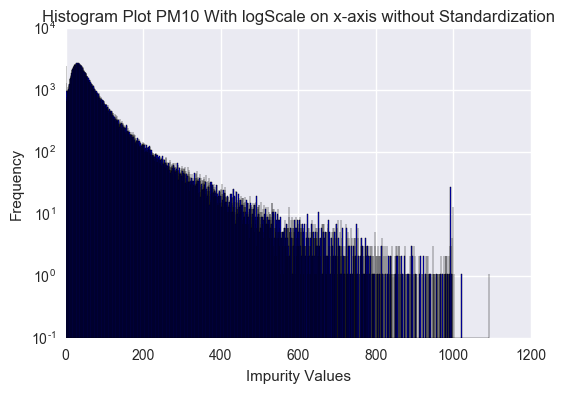

In [239]:
fig, ax = plt.subplots()
df_n.PM10.hist(ax=ax,bins=2000,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis without Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


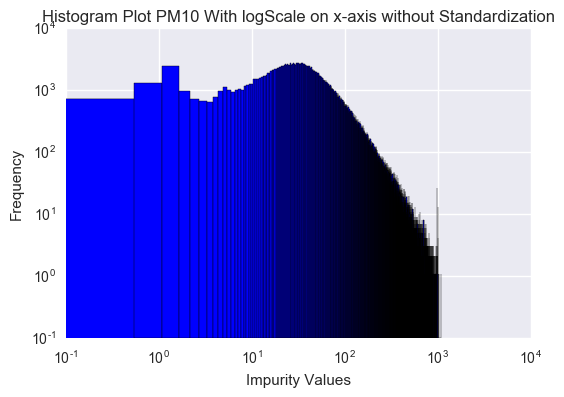

In [69]:
fig, ax = plt.subplots()
df_n.PM10.hist(ax=ax,bins=2000,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis without Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")

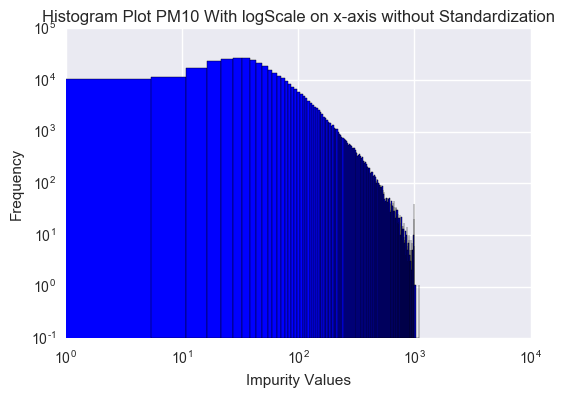

In [70]:
fig, ax = plt.subplots()
df_n.PM10.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis without Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")

<p><b> PM10 after standardization </b> </p>

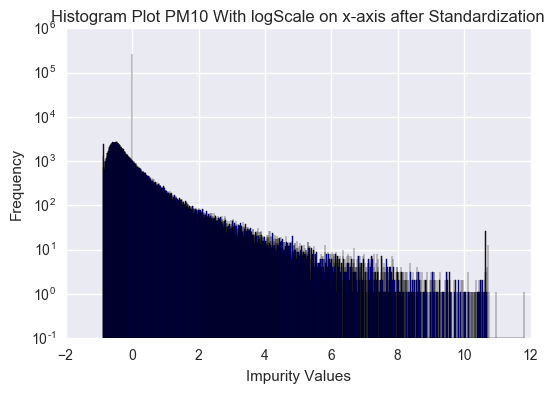

In [68]:
fig, ax = plt.subplots()
PM10.hist(ax=ax,bins=2000,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")

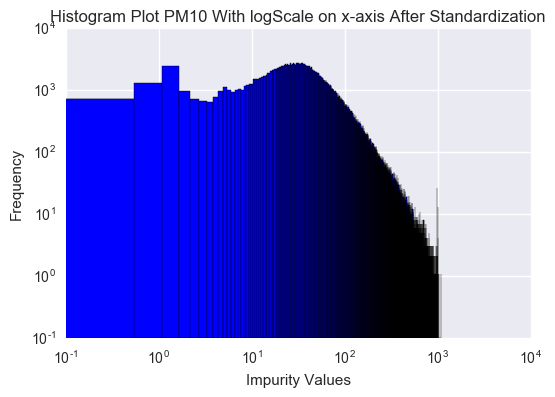

In [72]:
fig, ax = plt.subplots()
df_n.PM10.hist(ax=ax,bins=2000,color='blue',bottom=0.1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Histogram Plot PM10 With logScale on x-axis After Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


<p><b> Inverse Hyperbolic Function </b></p>

<p> We apply Inverse Hyperbolic transformation</p>

In [329]:
PM10_=PM10.apply(np.arcsinh)

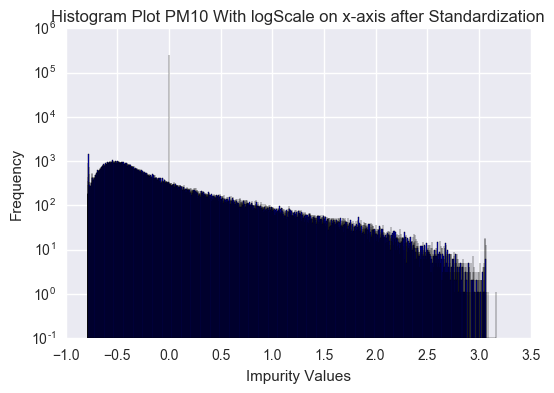

In [335]:
import gc;
gc.collect();
fig, ax = plt.subplots()
PM10_.hist(ax=ax,bins=2000,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")

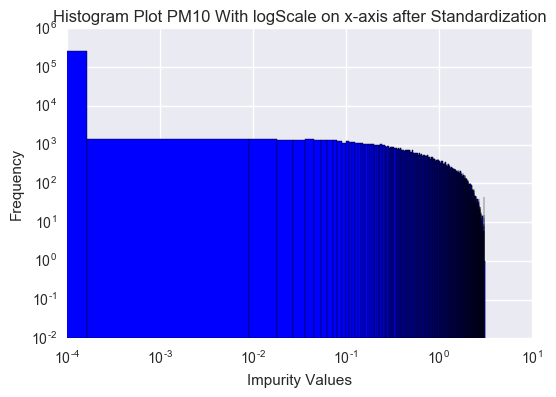

In [336]:

fig, ax = plt.subplots()
PM10_.hist(ax=ax,bins='auto',color='blue',bottom=0.01)
ax.set_yscale('log')
#ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")

<p><b> Box Cox Transformation </b></p>

<p> We have to get the required parameters for Box cos Transformation </p>
<p> Before this we note that Box cox does not work when we have zeros as values</p>
<p> We therefore make use of extended Box Cos. We first test the pandas library </p>
Reference: Extended Box Cox : https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf

In [49]:
from scipy import stats

In [52]:
y, lmax_mle = stats.boxcox(PM10+0.9)

In [53]:
lmax_pearsonr = stats.boxcox_normmax(PM10+0.9)

In [54]:
lmax_mle

0.20521243338784251

In [55]:
lmax_pearsonr

0.16758180933394051

In [56]:
stats.boxcox_normmax(PM10+1, method='all')

array([ 0.00100555,  0.03995181])

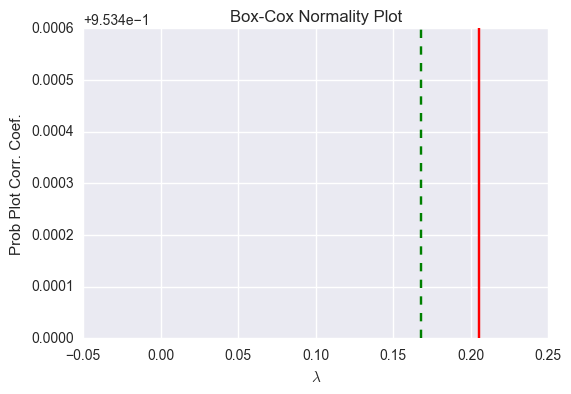

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(PM10.values+1, -0.01,0.05, plot=ax)
# prob = stats.boxcox_normplot(x, -10, 10, plot=ax)
ax.axvline(lmax_mle, color='r')
ax.axvline(lmax_pearsonr, color='g', ls='--')


Extended Box Cox : https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf

In [58]:
def funct(vec):
    '''
    Extended Box Cox when there are negative values
    '''
    lambda_1=0.20521243338784251;
    lambda_2=0.9; # choose lamda3 so that 
   
    vec=vec+lambda_2
    p1=(pow(vec,lambda_1)-1)/lambda_1
        #print(p1)
        #print(p1)
        #print(p)
        #pp.append(p1)
   
    return (p1)   

In [59]:
PM10_2=PM10.apply(funct)

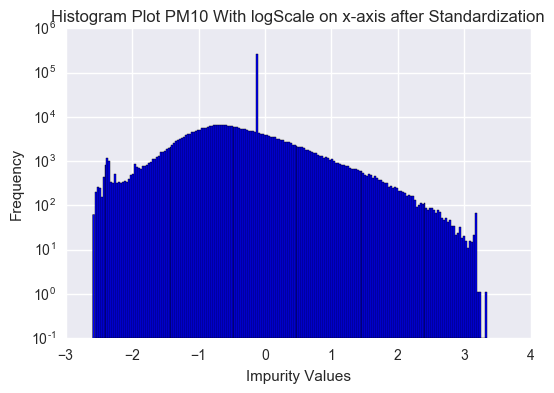

In [337]:
fig, ax = plt.subplots()
PM10_2.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

# Try Another parameter in the Cox Box

In [298]:
def funct2(vec):
    '''
    Extended Box Cox when there are negative values
    '''
    lambda_1=0.199951808712472593;
    lambda_2=0.9; # choose lamda3 so that 
   
    vec=vec+lambda_2
    p1=(pow(vec,lambda_1)-1)/lambda_1
        #print(p1)
        #print(p1)
        #print(p)
        #pp.append(p1)
   
    return (p1)   

In [299]:
PM10_4=PM10.apply(funct2)

In [287]:
ys, lmax_mles = stats.boxcox(PM10+1)

In [288]:
lmax_pearsonrs = stats.boxcox_normmax(PM10+1)

In [73]:
lmax_mles

0.039951808712472593

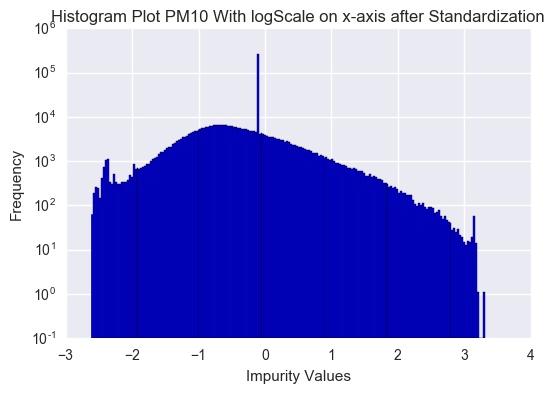

In [338]:
fig, ax = plt.subplots()
PM10_4.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

# Data Sets for MAchine Learning

<p> We prepare data having date and PM10 values as first set. Then we add other impurity information information and see the gain in information. After this, we add weather information and again see the impact.   </p>
    1. Datasets (PM10+date)
    2. Datasets (PM10+date+other impurities)
    3. Datasets (PM10 + date+ other impurities + weather information)

In [240]:
itemlist.columns

Index(['date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO', 'CO_null_pointers',
       'NO2', 'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers'],
      dtype='object')

In [241]:
itemlist.dtypes # see data types

date                  datetime64[ns]
PM10                         float64
NAME                          object
PM10_null_pointers             int64
CO                           float64
CO_null_pointers               int64
NO2                          float64
NO2_null_pointers              int64
O3                           float64
O3_null_pointers               int64
PM25                         float64
PM25_null_pointers             int64
dtype: object

In [242]:
#get the months and day values
temp = pd.DatetimeIndex(itemlist['date'])
#pandas['date'] = temp.date
itemlist['time'] = temp.time
itemlist['month'] = temp.month
itemlist['day'] = temp.day

In [108]:
itemlist[1:10]

,date,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,time,month,day
1,2007-01-02,NaN,-1,1.460885,1,NaN,-1,NaN,-1,NaN,-1,00:00:00,1,2
2,2007-01-02,NaN,-1,1.923636,1,NaN,-1,NaN,-1,NaN,-1,00:00:00,1,2
3,2007-01-02,1.499629,1,1.113822,1,1.412657,1,-0.839846,1,NaN,-1,00:00:00,1,2
4,2007-01-02,NaN,-1,NaN,-1,1.090017,1,NaN,-1,NaN,-1,00:00:00,1,2
5,2007-01-02,NaN,-1,0.963428,1,NaN,-1,NaN,-1,NaN,-1,00:00:00,1,2
6,2007-01-02,NaN,-1,1.460885,1,NaN,-1,NaN,-1,NaN,-1,00:00:00,1,2
7,2007-01-02,0.950396,1,0.332930,1,NaN,-1,-0.094688,1,NaN,-1,00:00:00,1,2
8,2007-01-02,1.499629,1,1.113822,1,1.412657,1,-0.839846,1,NaN,-1,00:00:00,1,2
9,2007-01-02,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,00:00:00,1,2


In [244]:
itemlist['hour'] = pd.to_datetime(itemlist['time'].astype(str), format='%H:%M:%S').dt.hour #extract hour

In [245]:
itemlist[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,time,month,day,hour
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0,NaN,0,00:00:00,1,2,0


In [246]:
itemlist['daysInterval']=itemlist['date'] - itemlist['date'].shift() # we use to learn the non uniformities in transition

In [247]:
itemlist.daysInterval.fillna(0,inplace=True); #fill Na 

In [248]:
itemlist[1:2]

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,time,month,day,hour,daysInterval
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0,NaN,0,00:00:00,1,2,0,0 days


In [249]:
itemlist['days_interval'] = itemlist.daysInterval.dt.days #extract days from the interval. we will also extract hours

In [250]:
itemlist['hour_interval'] = itemlist.daysInterval.dt.components.hours # extract the hours from the data set


In [252]:
itemlist.head()

,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,time,month,day,hour,daysInterval,days_interval,hour_interval
0,2007-01-02,NaN,Miladinovci,0,NaN,0,NaN,0,NaN,0,NaN,0,00:00:00,1,2,0,0 days,0,0
1,2007-01-02,NaN,Centar,0,1.460885,1,NaN,0,NaN,0,NaN,0,00:00:00,1,2,0,0 days,0,0
2,2007-01-02,NaN,Lisice,0,1.923636,1,NaN,0,NaN,0,NaN,0,00:00:00,1,2,0,0 days,0,0
3,2007-01-02,1.499629,Rektorat,1,1.113822,1,1.412657,1,-0.839846,1,NaN,0,00:00:00,1,2,0,0 days,0,0
4,2007-01-02,NaN,Mrsevci,0,NaN,0,1.090017,1,NaN,0,NaN,0,00:00:00,1,2,0,0 days,0,0


In [251]:
(itemlist.days_interval == 0).sum(axis=0)# we confirm that there is no gap in days in the reading. This should be dropped

626500

# Encode Names in the Data Frame
<p> This is done using pandas data frame dummy variables. </p>

In [253]:
one_hot = pd.get_dummies(itemlist['NAME'])


In [256]:
one_hot[1:5]

,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [257]:
itemlist_ = itemlist.copy(deep=True);

In [258]:
itemlist_ = itemlist_.join(one_hot);

In [260]:
# drop the names 
# drop the date
# And drop the dayInterval
# And drop days_interval

In [268]:
from pandas import ExcelWriter
writer = ExcelWriter('DataList.xlsx')
itemlist_.to_excel(writer,'Sheet1')
#itemlist.to_excel(writer,'Sheet2')
writer.save()


In [269]:
itemlist_.to_csv('ItemListWithDummy.csv')

In [270]:
itemlist.to_csv('ItemListNoDummy.csv')

# Datasets (PM10+date)

In [310]:
DateTimeDataSet = itemlist_.filter(['PM10','PM10_null_pointers','month','day','hour','hour_interval'], axis=1)

In [311]:
DateTimeDataSet[1:5]

,PM10,PM10_null_pointers,month,day,hour,hour_interval
1,NaN,0,1,2,0,0
2,NaN,0,1,2,0,0
3,1.499629,1,1,2,0,0
4,NaN,0,1,2,0,0


In [315]:
DateTimeDataSet_ = DateTimeDataSet.copy(deep=True)

In [316]:
DateTimeDataSet_.fillna(0,inplace=True) # fillna

In [317]:
DateTimeDataSet_.PM10=DateTimeDataSet_.PM10.apply(funct)

In [319]:
DateTimeDataSet_[1:3]

,PM10,PM10_null_pointers,month,day,hour,hour_interval
1,-0.10423,0,1,2,0,0
2,-0.10423,0,1,2,0,0


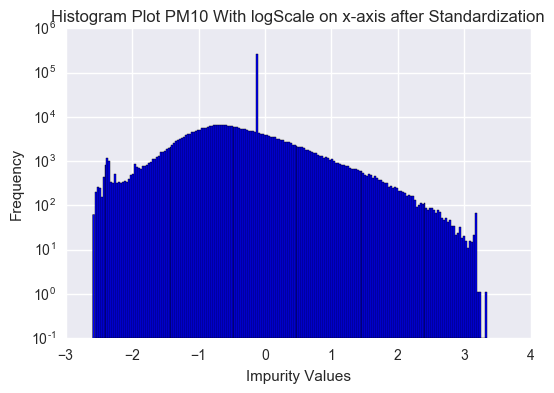

In [340]:
fig, ax = plt.subplots()
DateTimeDataSet_.PM10.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

# Datasets (PM10+date+other impurities)

In [272]:
DatasetWithImpurities = itemlist_.filter(['PM10','PM10_null_pointers','CO','CO_null_pointers','NO2','NO2_null_pointers', 'O3','O3_null_pointers','PM25', 'PM25_null_pointers','month','day','hour','hour_interval'], axis=1)

In [271]:
itemlist.columns


Index(['date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO', 'CO_null_pointers',
       'NO2', 'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers', 'time', 'month', 'day', 'hour', 'daysInterval',
       'days_interval', 'hour_interval'],
      dtype='object')

In [276]:
DatasetWithImpurities[1:2]

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,month,day,hour,hour_interval
1,NaN,0,1.460885,1,NaN,0,NaN,0,NaN,0,1,2,0,0


In [277]:
DatasetWithImpurities_ = DateTimeDataSet_.copy(deep=True)

In [341]:
DatasetWithImpurities_.fillna(0,inplace=True)

In [342]:
DatasetWithImpurities_.PM10=DatasetWithImpurities_.PM10.apply(funct) # Box cox

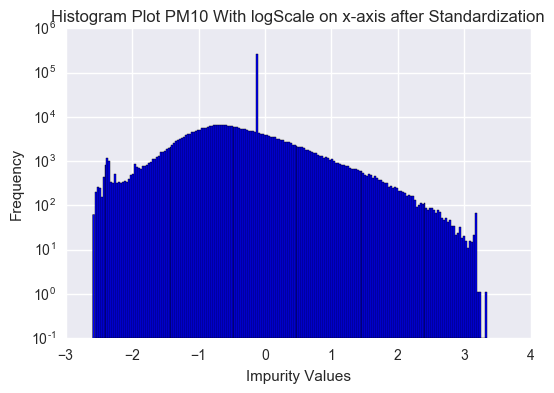

In [343]:
fig, ax = plt.subplots()
DatasetWithImpurities_.PM10.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

In [345]:
DateTimeDataSet_.to_csv('DateTimeDataSet.csv')

In [344]:
DatasetWithImpurities_.to_csv('DatasetWithImpurities.csv')

## Extract Target Variable